In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dem_stitcher.stitcher import stitch_dem
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt

In [3]:
%%time

# Bay Area
# xmin, ymin, xmax, ymax
bounds = [-121.5, 34.95, -120.2, 36.25]

X, p = stitch_dem(bounds,
                  dem_name='glo_30',
                  dst_ellipsoidal_height=False,
                  dst_area_or_point='Area')

Reading glo_30 Datasets: 100%|█| 6/6 [00:07<00:00,  1.26s/it


CPU times: user 3.97 s, sys: 1.41 s, total: 5.38 s
Wall time: 3min 17s


Text(0, 0.5, 'Latitude')

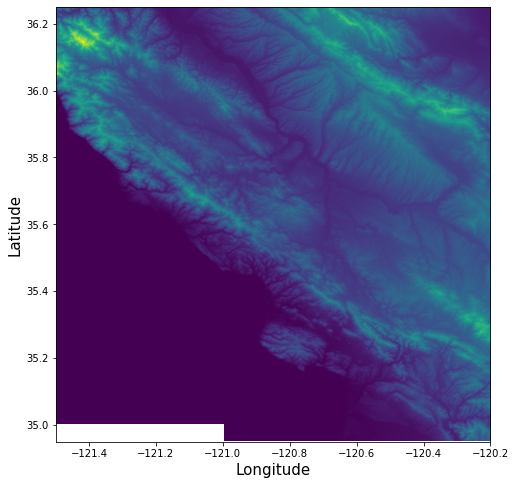

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = plot.show(X, transform=p['transform'], ax=ax)
ax.set_xlabel('Longitude', size=15)
ax.set_ylabel('Latitude', size=15)

In [5]:
with rasterio.open('glo_30_over_the_bay.tif', 'w', **p) as ds:
    ds.write(X, 1)